In [ ]:
!nvidia-smi

Wed Oct  9 07:26:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

import os
from getpass import getpass
from roboflow import Roboflow

# Prompt the user to enter the API key (without echoing it to the screen)
ROBOFLOW_API_KEY = getpass("Enter your Roboflow API Key: ")

# Store the API key as an environment variable
os.environ["ROBOFLOW_API_KEY"] = ROBOFLOW_API_KEY

# Now, you can access it from Roboflow using the environment variable
rf = Roboflow(api_key=os.environ["ROBOFLOW_API_KEY"])

workspace = rf.workspace("deep-learning-bew1p")
project = workspace.project("ppe-kit-wvs8u")
version = project.version(2)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
Enter your Roboflow API Key: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE-Kit-2 in yolov11:: 100%|██████████| 604/604 [00:00<00:00, 6262.45it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="u2jyLyNfxWvQhnDDHMWf")
project = rf.workspace("deep-learning-bew1p").project("ppe-kit-wvs8u")
version = project.version(2)
dataset = version.download("yolov11")


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 460MB/s]
Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/PPE-Kit-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				    R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1728459505.b35e694412cc.3824.0  results.csv       val_batch1_labels.jpg
F1_curve.png					    results.png       val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights
labels.jpg					    train_batch1.jpg


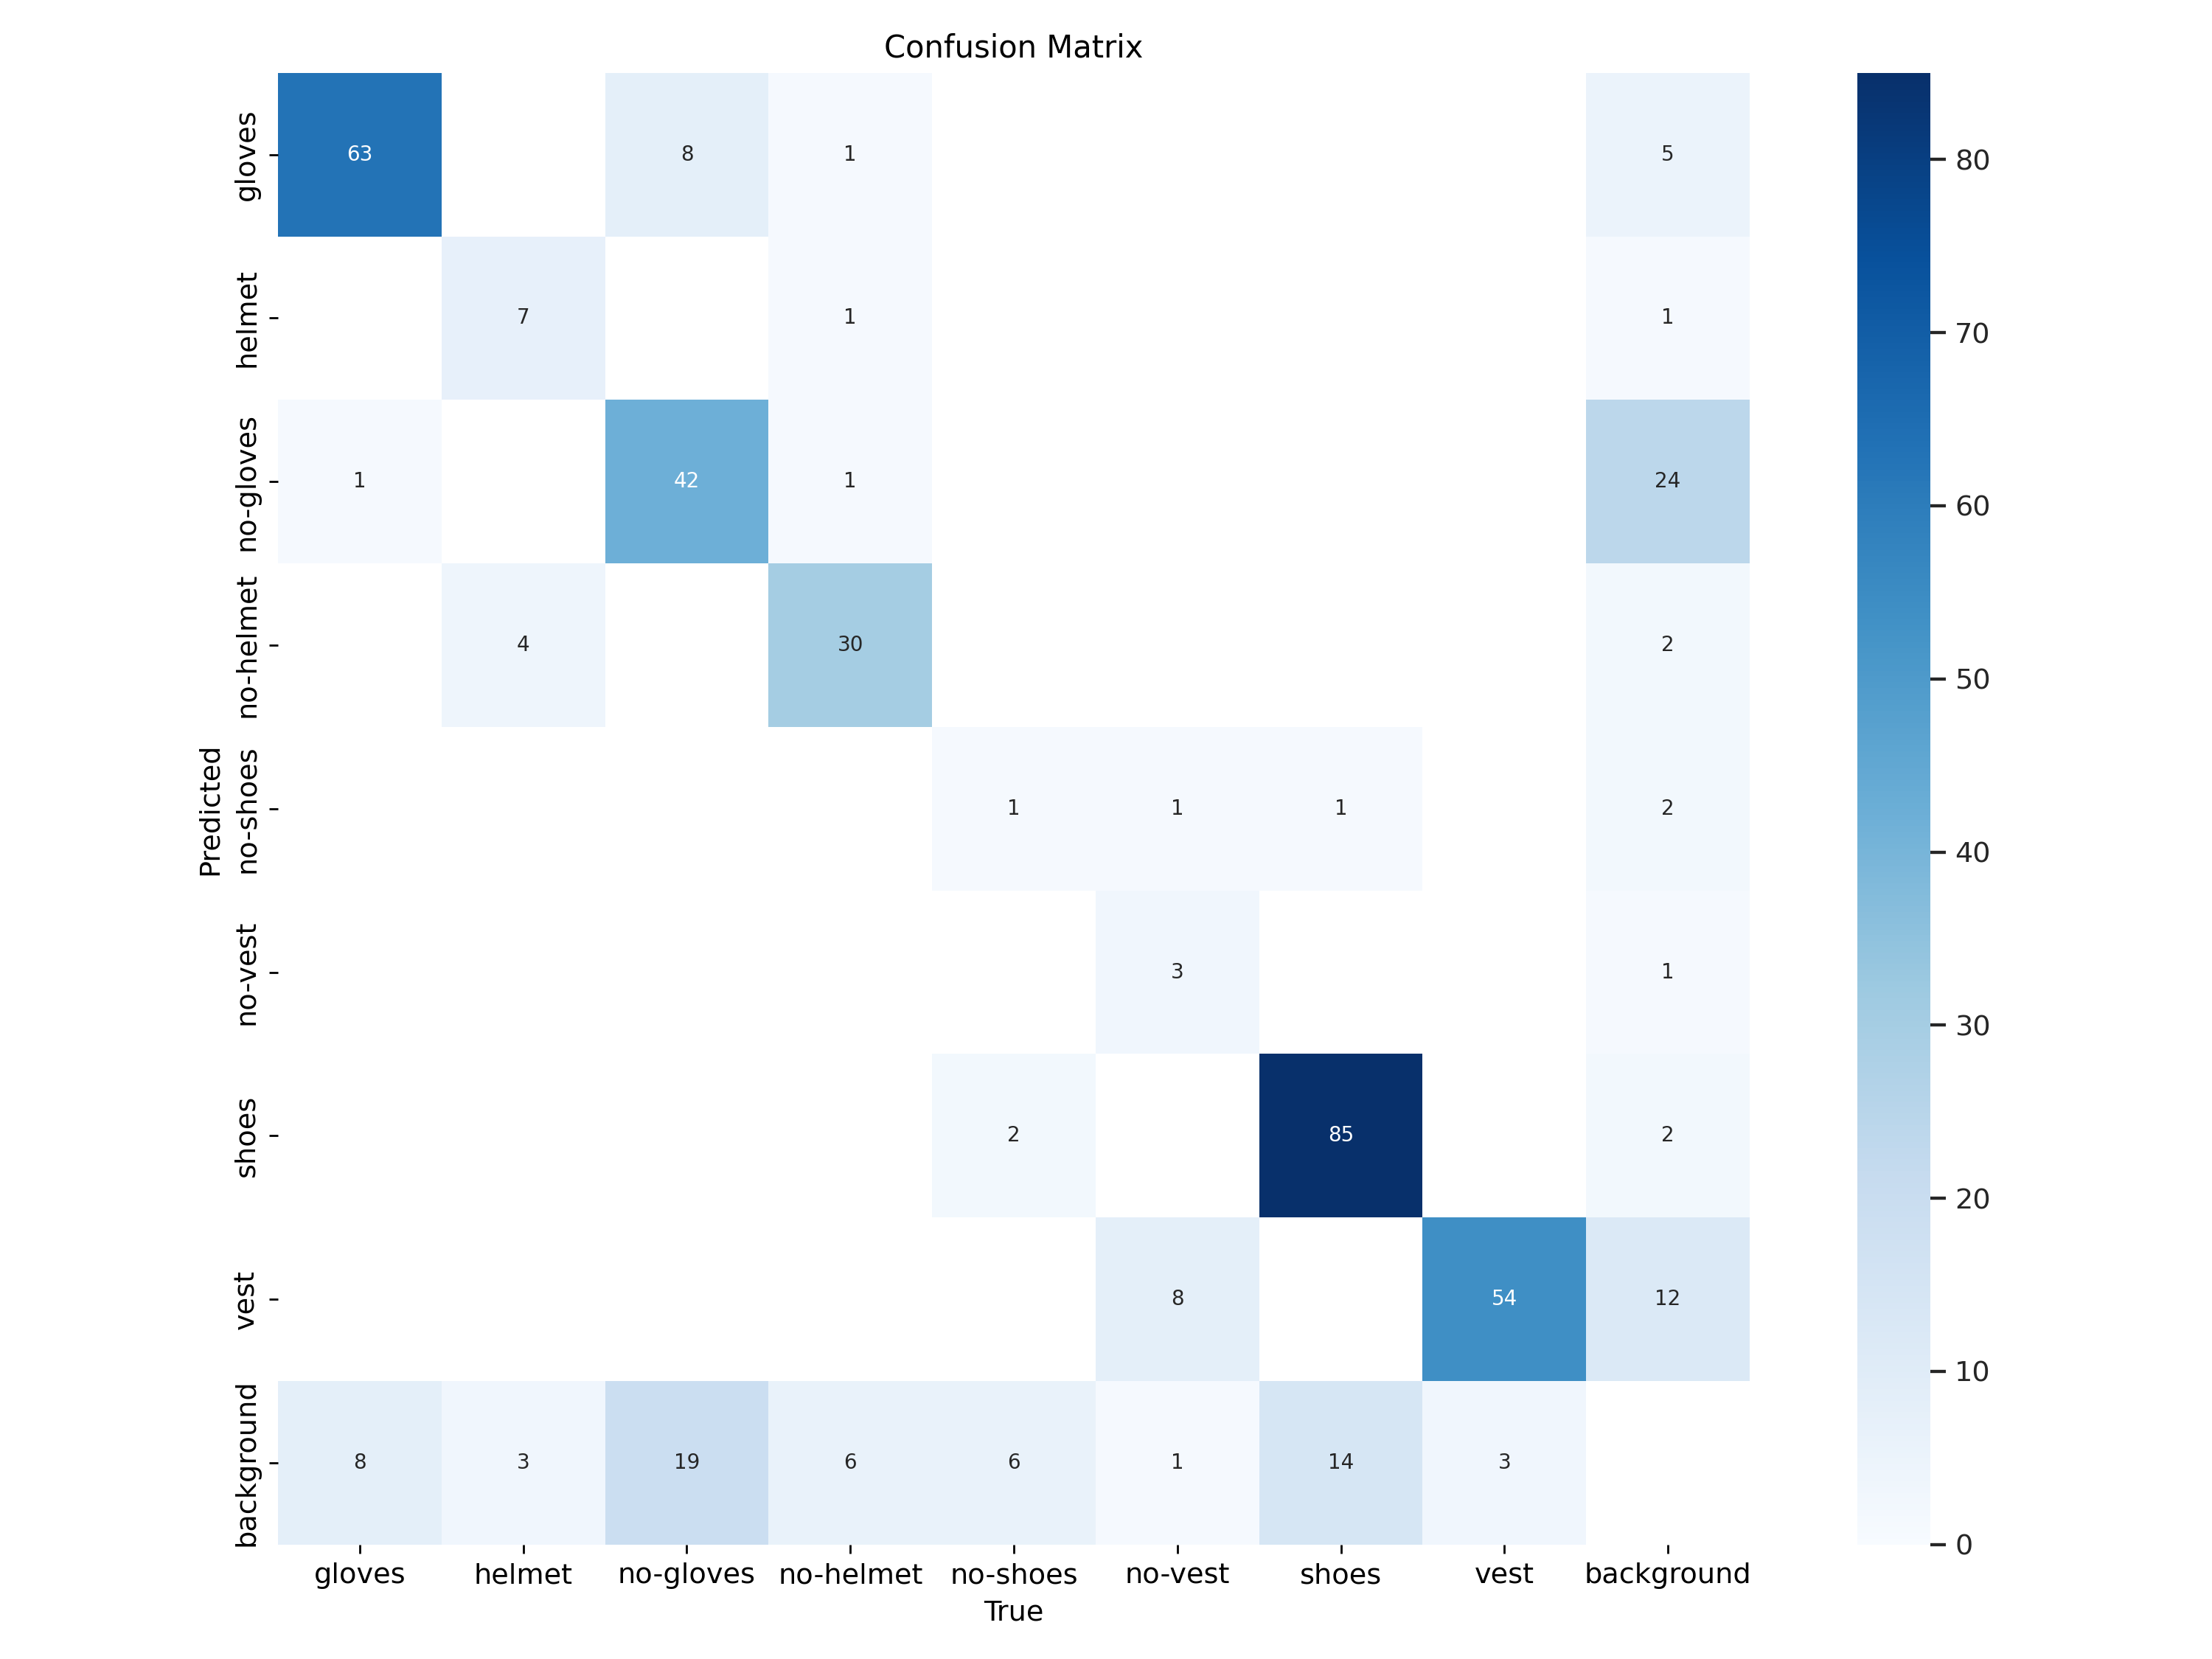

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

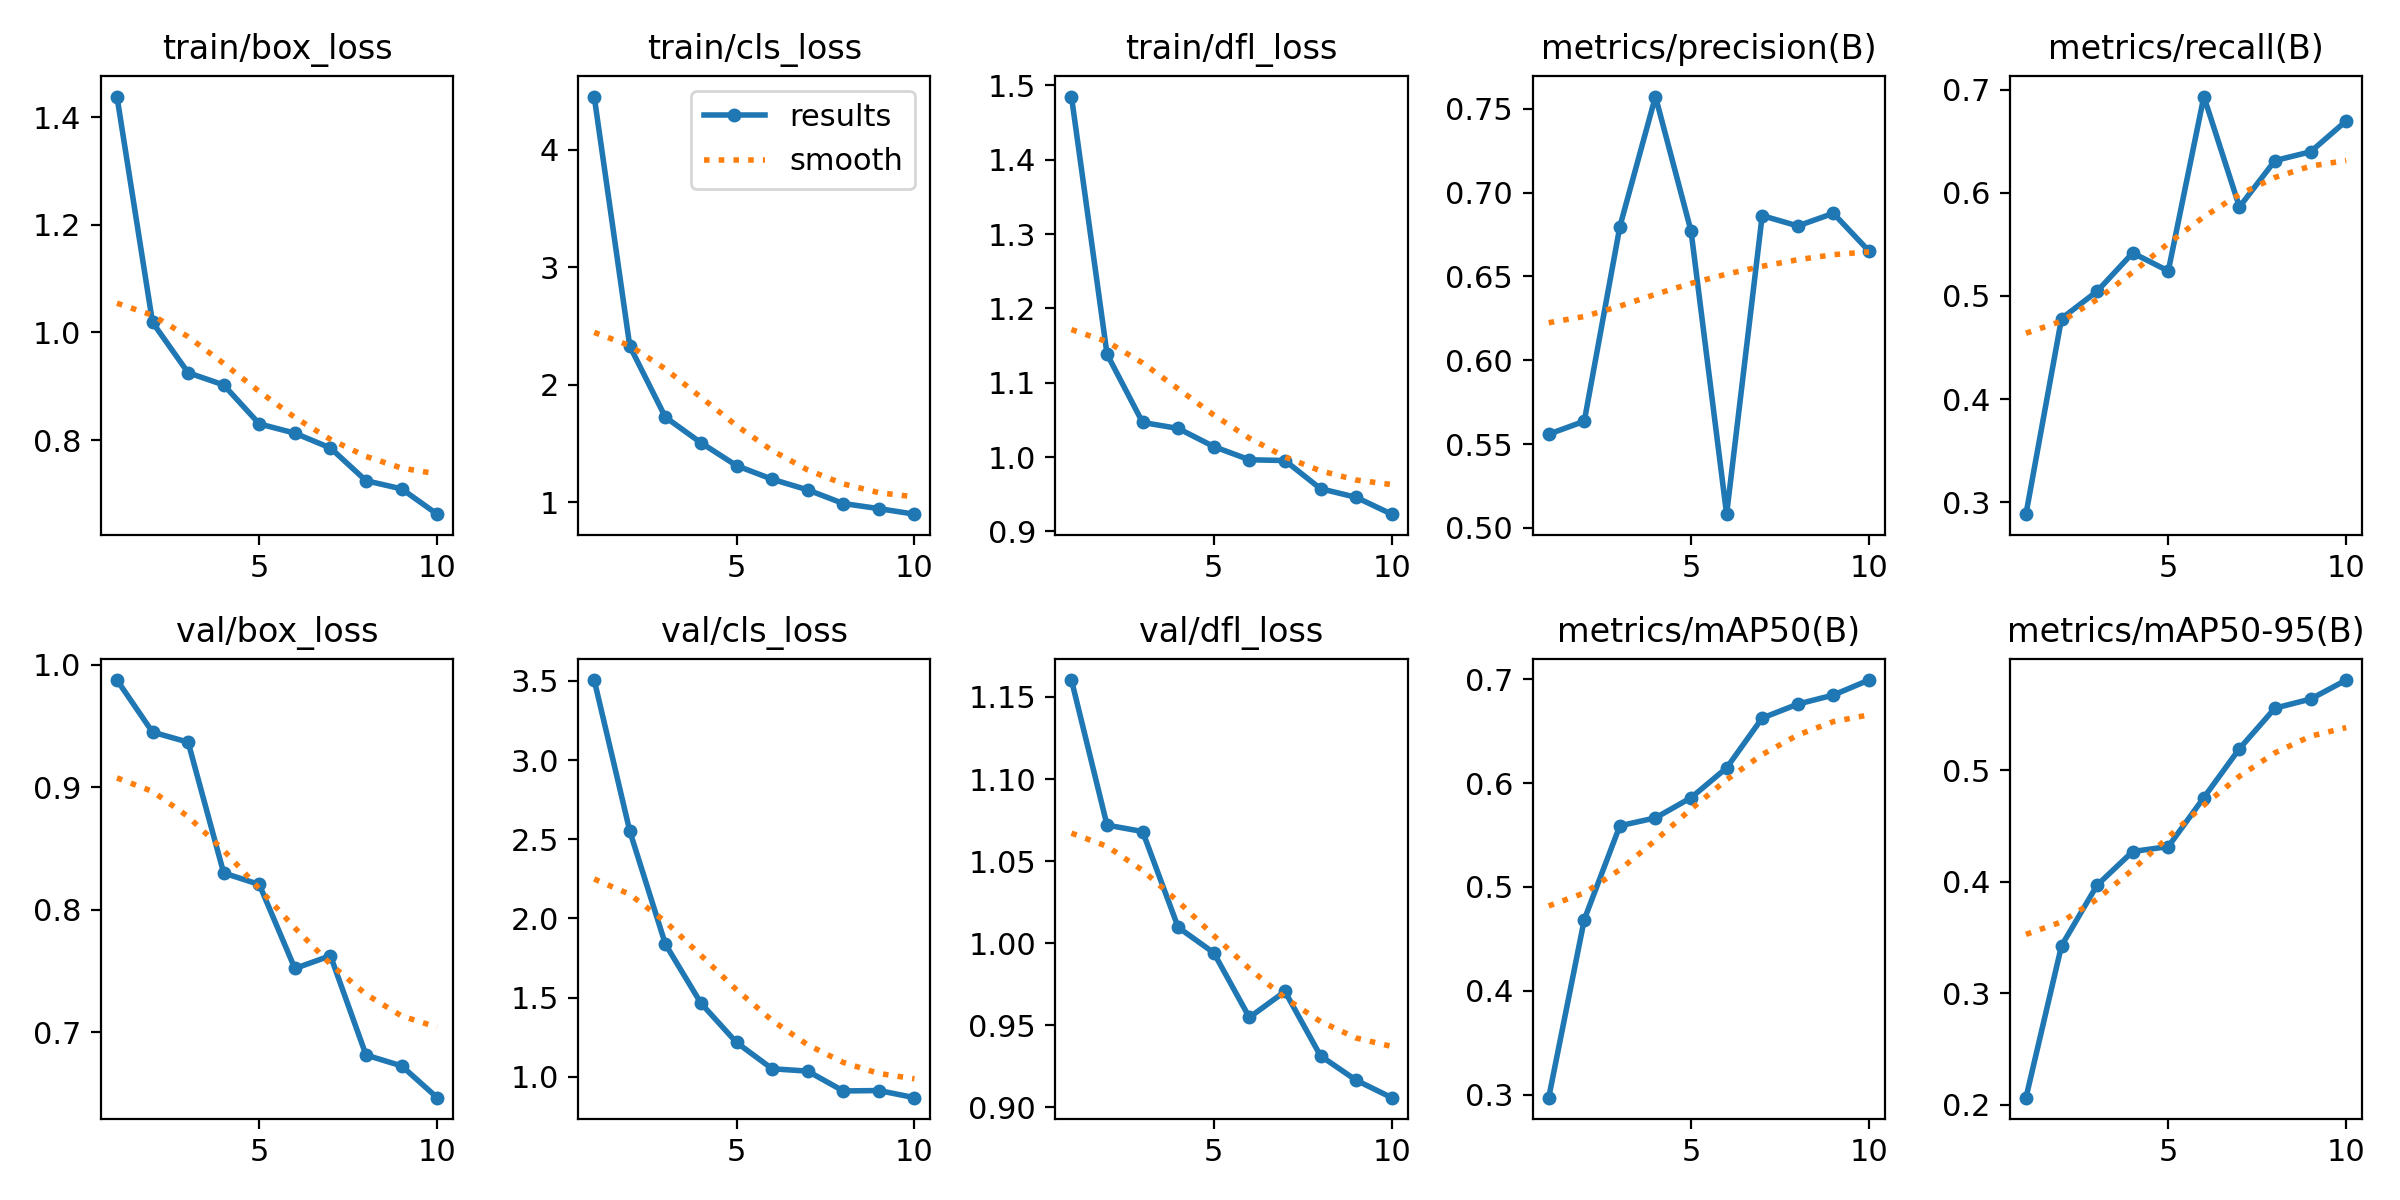

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

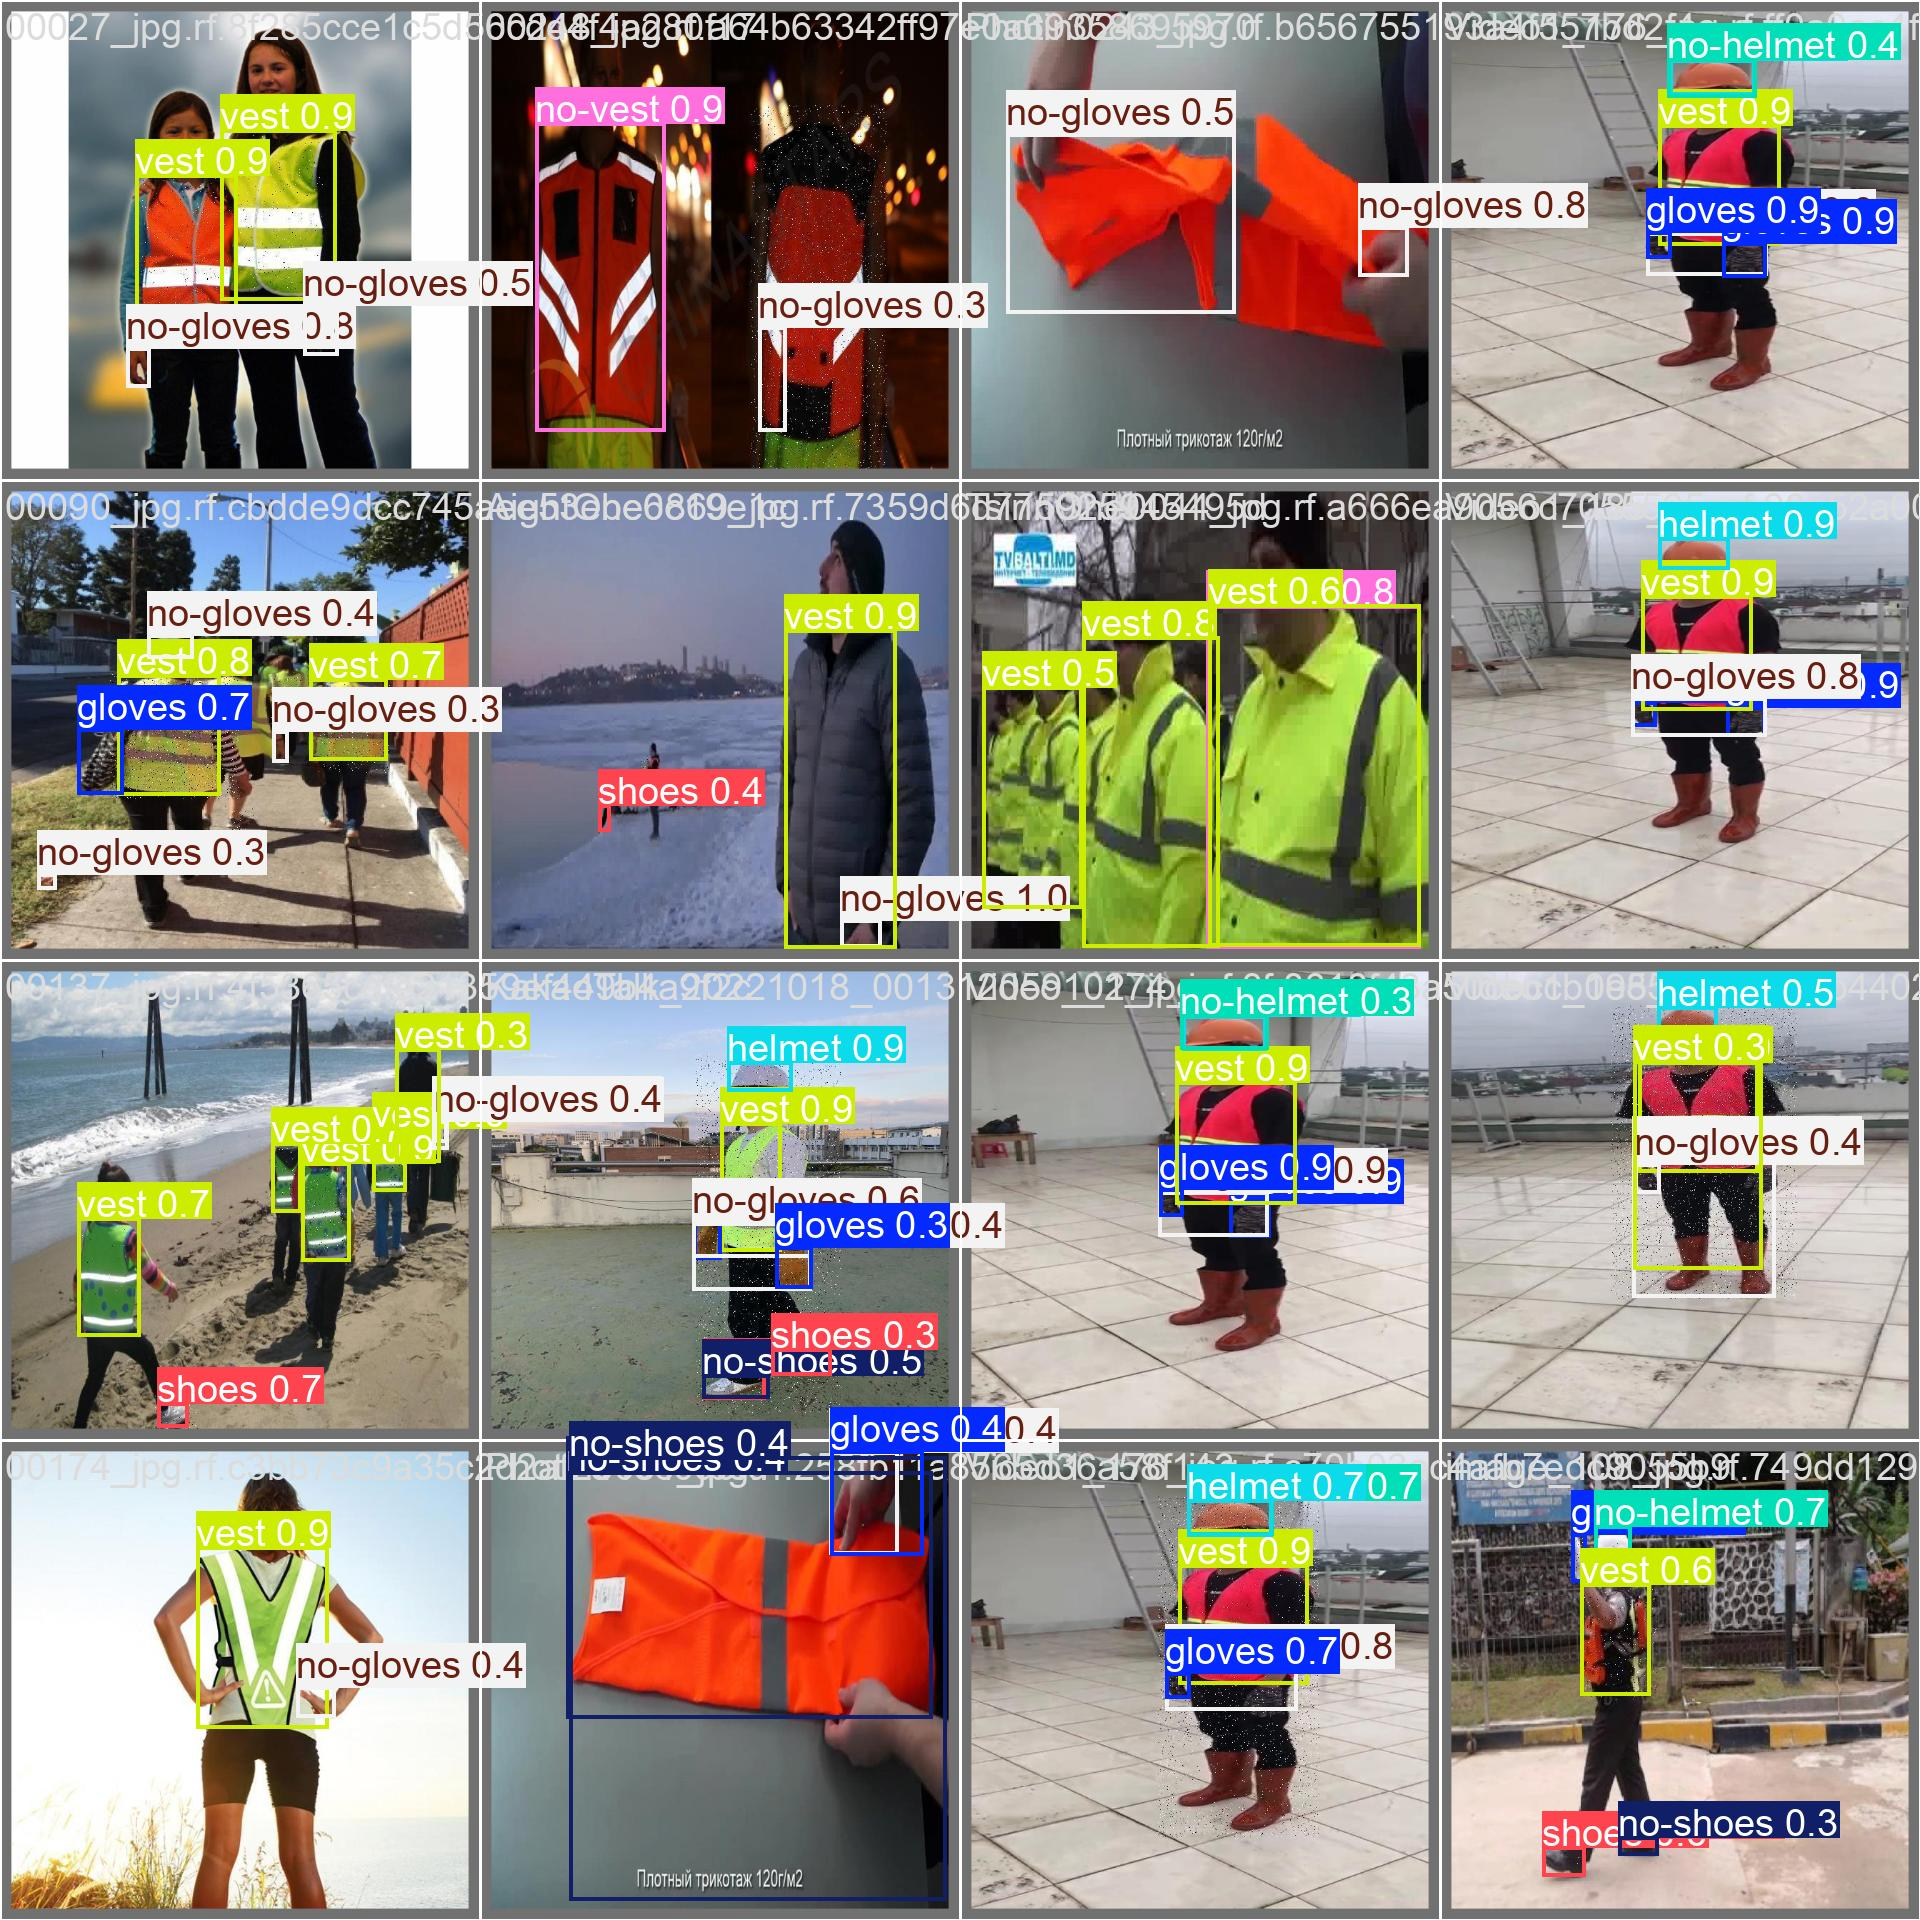

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/PPE-Kit-2/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.14s/it]
                   all         59        373      0.663      0.671        0.7      0.583
                gloves         39         72      0.758      0.889      0.894      0.761
                helmet         12         14      0.788      0.643      0.688       0.54
             no-gloves         48         69      0.535       0.71      0.669      0.497
             no-helmet         39         39      0.751      0.795      0.884      0.783
              no-shoes          7          9      0.288      0.222      0.206      0.163
               no-vest         13         13    

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.8 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs

image 1/30 /content/datasets/PPE-Kit-2/test/images/00096_jpg.rf.1b61aa09f057da2a7f309fc754fc4efb.jpg: 640x640 2 helmets, 1 no-gloves, 2 no-helmets, 1 no-shoes, 5 vests, 15.6ms
image 2/30 /content/datasets/PPE-Kit-2/test/images/00173_jpg.rf.f79dcaa69d925cde95ee78704cb837c6.jpg: 640x640 1 no-gloves, 2 no-helmets, 2 shoess, 2 vests, 15.6ms
image 3/30 /content/datasets/PPE-Kit-2/test/images/00224_jpg.rf.ac532e908bd95cf22c5c11bce8681d63.jpg: 640x640 2 glovess, 5 no-glovess, 4 shoess, 5 vests, 15.6ms
image 4/30 /content/datasets/PPE-Kit-2/test/images/KakaoTalk_20221018_001219713_26_jpg.rf.c19de72dd0d3a25ccd1c25bfb18bcd02.jpg: 640x640 2 no-glovess, 1 no-helmet, 2 shoess, 1 vest, 15.5ms
image 5/30 /content/datasets/PPE-Kit-2/test/images/KakaoTalk_20221018_001425789_06_jpg.rf.31626b30ca82ede5411d33958ea76a20.jpg: 640x640 2 glovess,

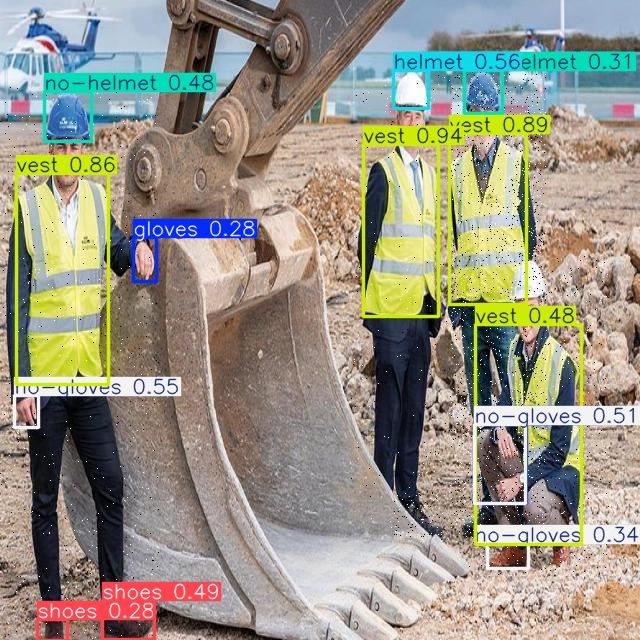

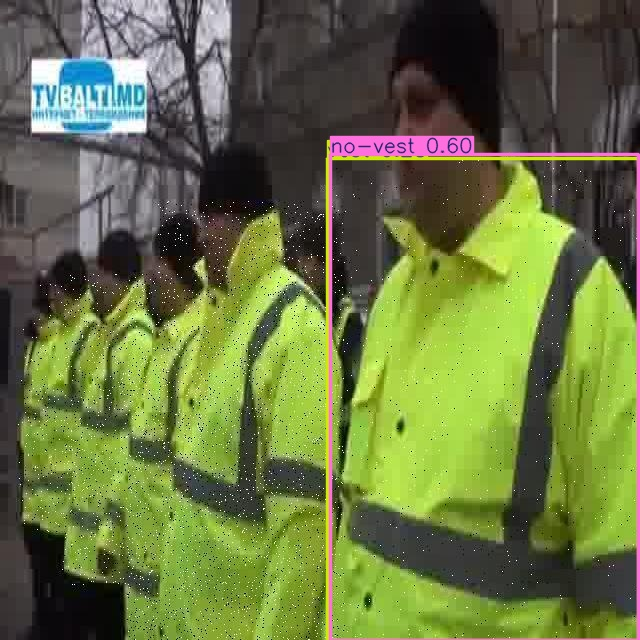

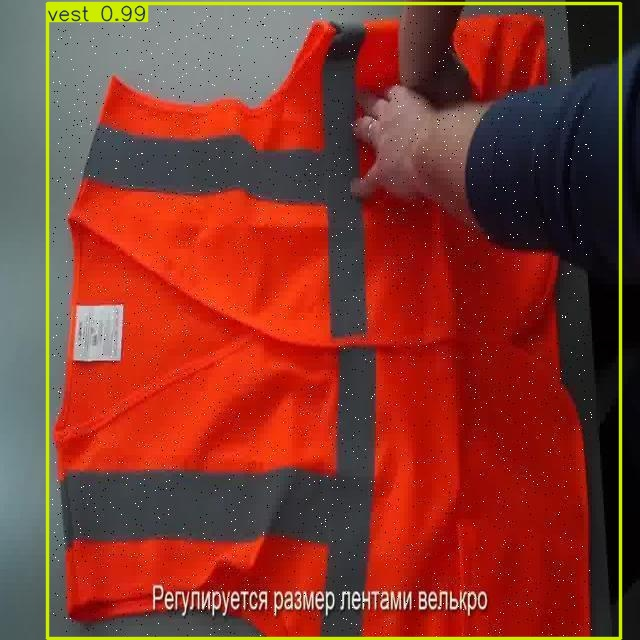

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")